In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [38]:
lista=[]
with open('data.txt', 'r') as f_open:
    for index, line in enumerate(f_open):
        lista.append("{}. {}".format(index, line.strip()))

In [45]:
import csv
with open('train.csv', 'r') as f_open:
    data = csv.DictReader(f_open)
    data = [d for d in data]

In [27]:
df = pd.read_csv('/Users/lucasosouza/Documents/Projects-Ongoing/Tests/train.csv')

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


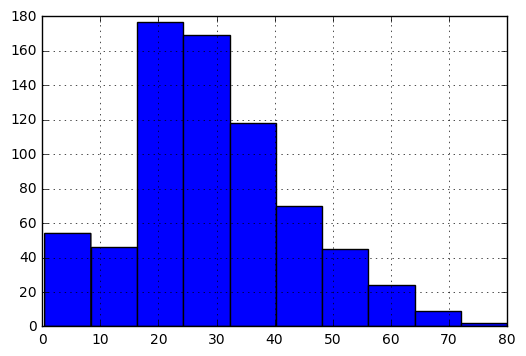

In [10]:
df['Age'].hist()

In [87]:
url = "bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A{}.zip"
for year in range(2010,2018):
    !wget {url.format(year)}
    

--2018-03-24 18:57:26--  http://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2010.zip
Resolving bvmf.bmfbovespa.com.br... 177.54.222.61
Connecting to bvmf.bmfbovespa.com.br|177.54.222.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10385444 (9.9M) [application/x-zip-compressed]
Saving to: ‘COTAHIST_A2010.zip.1’

COTAHIST_A2010.zip. 100%[===================>]   9.90M   937KB/s    in 14s     

2018-03-24 18:57:40 (746 KB/s) - ‘COTAHIST_A2010.zip.1’ saved [10385444/10385444]

--2018-03-24 18:57:40--  http://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2011.zip
Resolving bvmf.bmfbovespa.com.br... 177.54.222.61
Connecting to bvmf.bmfbovespa.com.br|177.54.222.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10856136 (10M) [application/x-zip-compressed]
Saving to: ‘COTAHIST_A2011.zip.1’

COTAHIST_A2011.zip. 100%[===================>]  10.35M   764KB/s    in 13s     

2018-03-24 18:57:53 (823 KB/s) - ‘COTAHIST_A2011.zip.1’ save

In [94]:
url = "COTAHIST_A{}.zip"
for year in range(2010,2012):
    !unzip {url.format(year)}

Archive:  COTAHIST_A2010.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of COTAHIST_A2010.zip or
        COTAHIST_A2010.zip.zip, and cannot find COTAHIST_A2010.zip.ZIP, period.
Archive:  COTAHIST_A2011.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of COTAHIST_A2011.zip or
        COTAHIST_A2011.zip.zip, and cannot find COTAHIST_A2011.zip.ZIP, period.


In [96]:
files = !ls *.TXT

In [97]:
files

['COTAHIST_A2013.TXT',
 'COTAHIST_A2014.TXT',
 'COTAHIST_A2015.TXT',
 'COTAHIST_A2016.TXT',
 'COTAHIST_A2017.TXT']

In [101]:
def convert_to_object(line):
    obj = {
        'data': datetime.strptime(line[2:10], '%Y%m%d') if line[2:10] != 'COTAHIST' else 0,
        'ticker': line[12:24].strip(),
        'preco': float(line[108:121])/100 if line[108:121] != ''else 0
    }
    
    return obj

In [102]:
def convert_to_dataframe(file_name):
    dados = []
    first = True
    with open(file_name, 'r') as f:
        for line in f:
            if first:
                first=False
            else:
                obj = convert_to_object(line.strip())
                dados.append(obj)
    df = pd.DataFrame(dados)
    df.index = df['data']
    del df['data']
    
    return df

In [110]:
dataframes = []
for file in files[2:]:
    dataframes.append(convert_to_dataframe(file))

In [113]:
df = pd.concat(dataframes)

In [81]:
df.head()

,nome,preco,ticker
data,,,
2013-01-02 00:00:00,APPLE,112.00,AAPL11B
2013-01-02 00:00:00,ABC BRASIL,14.15,ABCB4
2013-01-02 00:00:00,ABC BRASIL,14.13,ABCB4F
2013-01-02 00:00:00,ABRIL EDUCA,40.97,ABRE11
2013-01-02 00:00:00,ABRIL EDUCA,41.10,ABRE11F


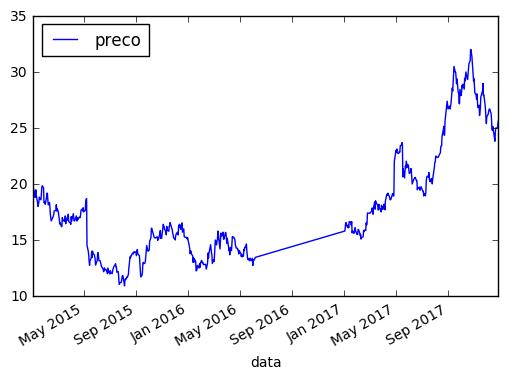

In [117]:
df[df['ticker'] == 'HGTX3'].plot()

In [42]:
df.shape

(378918, 2)

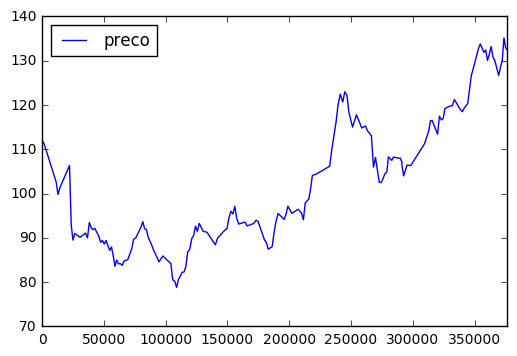

In [44]:
df[df['nome'] == 'APPLE'].plot()

In [33]:
df.iloc[0, 0]

'APPLE       '

In [28]:
df.head(100)

,nome,preco
0,APPLE,112.00
1,ABC BRASIL,14.15
2,ABC BRASIL,14.13
3,ABRIL EDUCA,40.97
4,ABRIL EDUCA,41.10
5,ANHANGUERA,36.62
6,ANHANGUERA,36.60
7,ANHANGUERA,37.68
8,AEDU,0.71
9,FII AESAPAR,119.69


In [82]:
!wget bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A201.zip

--2018-03-24 18:25:11--  http://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2016.zip
Resolving bvmf.bmfbovespa.com.br... 177.54.222.61
Connecting to bvmf.bmfbovespa.com.br|177.54.222.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15715361 (15M) [application/x-zip-compressed]
Saving to: ‘COTAHIST_A2016.zip’

COTAHIST_A2016.zip  100%[===================>]  14.99M  1.51MB/s    in 9.8s    

2018-03-24 18:25:21 (1.52 MB/s) - ‘COTAHIST_A2016.zip’ saved [15715361/15715361]



In [120]:
import quandl

In [158]:
df1 = quandl.get('BCB/1', start_date='2010-01-01', end_date='2017-12-31')

In [155]:
df1.head()

,Value
Date,
2000-01-03,1.8011
2000-01-04,1.8337
2000-01-05,1.8544
2000-01-06,1.8461
2000-01-07,1.8281


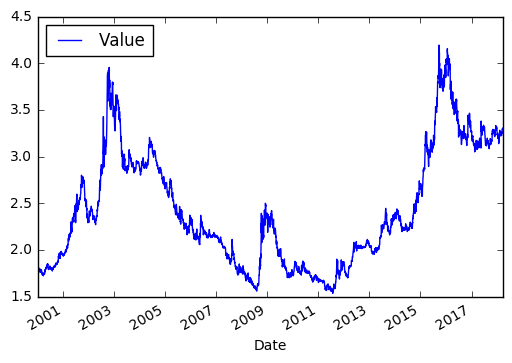

In [149]:
df.plot()

In [255]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 12, 31)
df2 =web.DataReader("PETR4.SA", 'yahoo', start, end)

In [256]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,36.950001,37.320000,36.820000,37.320000,33.627335,13303600.0
2010-01-05,37.380001,37.430000,36.799999,37.000000,33.339001,21396400.0
2010-01-06,36.799999,37.500000,36.799999,37.500000,33.789528,18720600.0
2010-01-07,37.270000,37.450001,37.070000,37.150002,33.474155,10964600.0
2010-01-08,37.160000,37.389999,36.860001,36.950001,33.293945,14624200.0


In [257]:
df2['dollar'] = df['Value']

In [258]:
df2[['Adj Close', 'dollar']].head()

,Adj Close,dollar
Date,,
2010-01-04,33.627335,1.7240
2010-01-05,33.339001,1.7227
2010-01-06,33.789528,1.7337
2010-01-07,33.474155,1.7413
2010-01-08,33.293945,1.7390


In [259]:
df2 = df2.dropna()
y_train = df2.loc['2010':'2016', 'Adj Close']
y_test = df2.loc['2017-01-01':'2017-12-31', 'Adj Close']
x_train = df2.loc['2010':'2016', 'dollar']
x_test = df2.loc['2017-01-01':'2017-12-31', 'dollar']


In [260]:
# null_train = x_train.notnull() | y_train.notnull()
# null_test = x_test.notnull() | y_test.notnull()

# x_train = x_train[null_train]
# y_train = y_train[null_train]
# x_test = x_test[null_test]
# y_test = y_test[null_test]


In [261]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train.reshape((-1,1)), y_train)

/Users/lucasosouza/anaconda/envs/udacity/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [262]:
pred = model.predict(x_test.reshape(-1,1))

/Users/lucasosouza/anaconda/envs/udacity/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


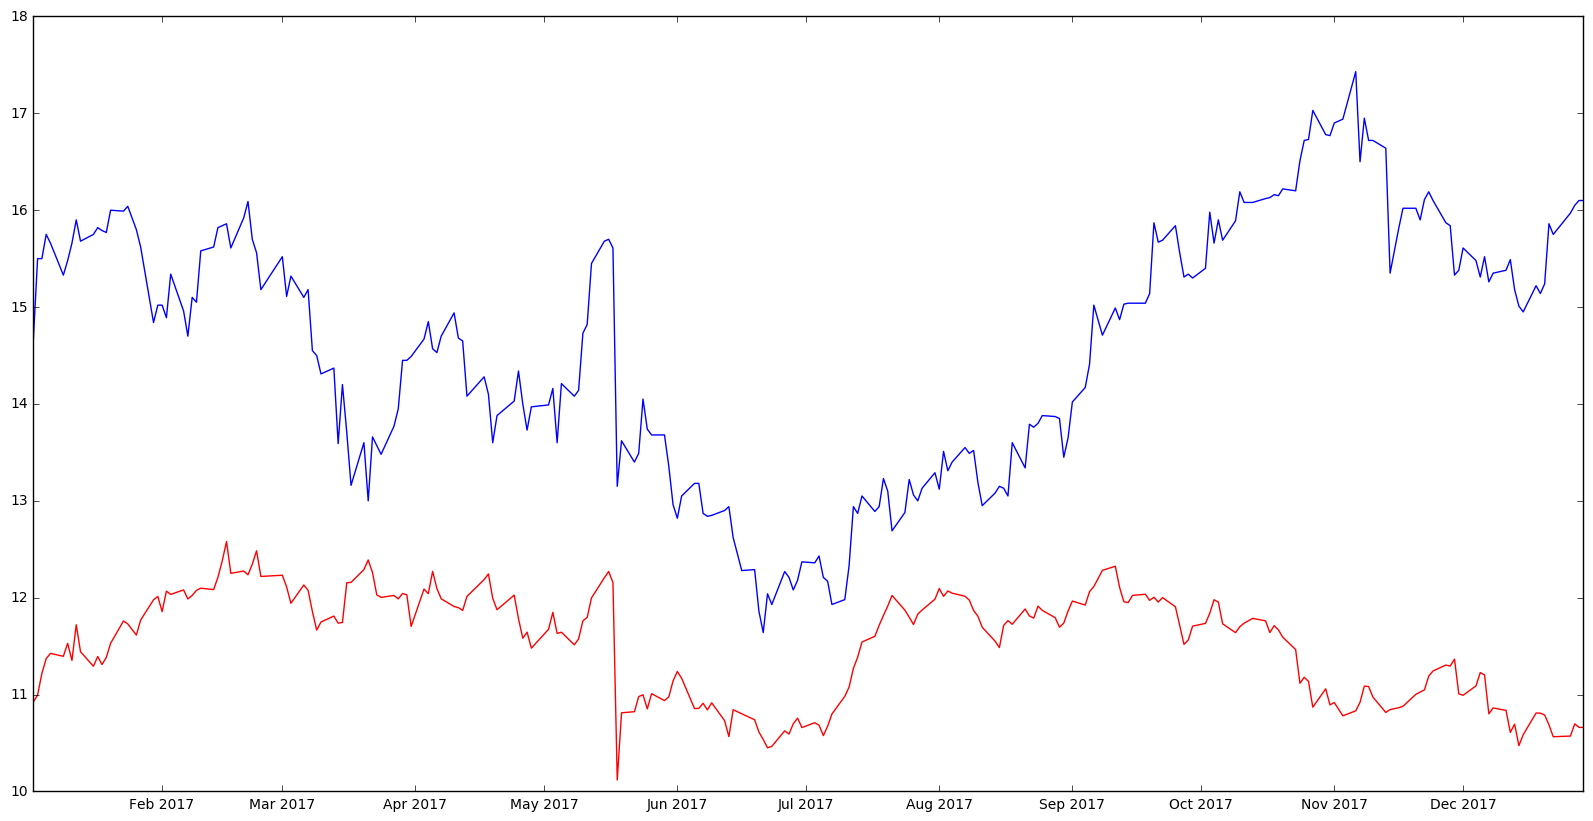

In [267]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color='blue')
plt.plot(pd.Series(pred, index=y_test.index), color='red')

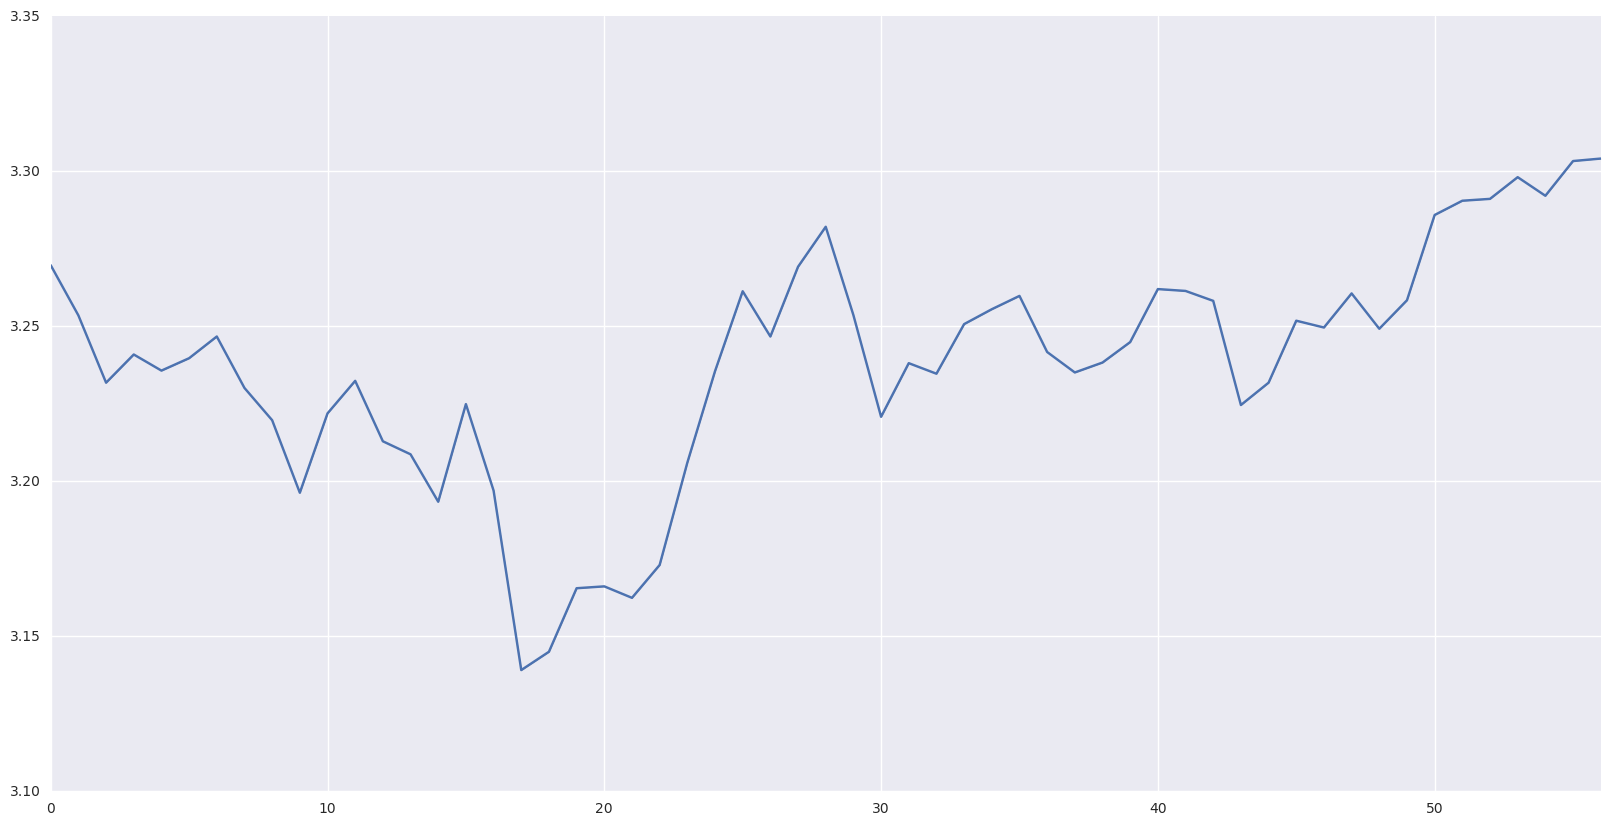

In [58]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.tsplot(df['Value'])

In [80]:
df = pd.read_excel('2014_03_23 Valuation Naoum.xlsx', sheet_name='DF', skiprows=1)

In [81]:
df.head()

,Unnamed: 0,BALANCE SHEET,2010,2011,2012,2013,2014,2015,2016,2017,...,2019,2020,2021,2022,2023,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,ASSETS,50293,49632.15084,48194,53596.104673,61506.664438,67012.504217,72585.035079,78801.618811,...,92127.875209,99452.412995,107149.672859,115414.405433,122503.382770,NaN,NaN,NaN,NaN,NaN
1,NaN,Current Assets,2000,2670.59714,3071.17,9683.558386,18311.660745,24631.043117,31113.116572,38335.242898,...,53960.584482,62578.664862,71665.467319,81415.742487,91686.262418,NaN,NaN,NaN,NaN,NaN
2,NaN,Cash and Equivalents,277,730.89494,596.154,7066.648150,15334.041209,21835.899804,28194.145723,35219.623632,...,50544.194303,58980.475322,67896.203776,77445.857078,87527.923059,NaN,NaN,NaN,NaN,NaN
3,NaN,Trade and other Receivables,1576,1780.15897,2308.74,2490.743073,2843.073490,2654.401478,2770.488889,2959.013846,...,3244.565336,3418.103495,3580.622595,3772.173986,3951.237232,NaN,NaN,NaN,NaN,NaN
4,NaN,Inventory,147,159.54323,166.277,126.167163,134.546046,140.741835,148.481960,156.605420,...,171.824843,180.086045,188.640948,197.711423,207.102126,NaN,NaN,NaN,NaN,NaN
